In [1]:
import numpy as np
import random
import math
from numpy.linalg import norm, eig
#plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')


##### Noisy gradient $$x_{k+1}=x_k-h\nabla g(x_k), h=\frac{1+\beta}{L(1-\beta)^2}, \|\nabla f(x) - g(x)\|\leq\beta\|\nabla f(x)\| $$

In [10]:
def generate_data(size):
    A = np.random.randn(size,size)
    x = np.random.randn(size)
    b = A.dot(x)
    AA=2*A.T.dot(A)
    Ab=2*A.T.dot(b)
    return A, b, x, AA, Ab

def f(x):
    global A, b
    return norm(A@x  - b) ** 2
    
def grad_f(x):
    global AA, Ab
    return AA.dot(x) - Ab 

def def_alpha():
    global AA
    #собственные значения матрицы 2* A.T @ A
    eigenvalues, _ = eig(AA)
    return max(eigenvalues), min(eigenvalues)
    
def grad_descent(beta, eps):
    global x, size
    f_solution = f(x)
    alpha, mu = def_alpha() 
    print (alpha,mu)
    H = (1 - beta) / (alpha * (1 + beta) ** 2)
    # в начале градиентного спуска инициализируем значение x какими-нибудь вектором
    cur_x = np.ones(size)
    print(f(cur_x))
    steps = [[cur_x, f(cur_x)]]
    # итерация цикла -- шаг градиентнго спуска
    while  f(cur_x) - f_solution > eps:
        steps.append([cur_x, f(cur_x)])
        norm_vector = beta * norm(grad_f(cur_x))
        random_vector = np.random.randn(size)
        normalize_vector = random_vector * norm_vector / norm(random_vector)
        cur_x = cur_x - H * (grad_f(cur_x) + normalize_vector)
    steps.append([cur_x, f(cur_x)])
    return np.array(steps)

In [11]:
size = 100
A,b,x, AA, Ab = generate_data(size)
beta, eps = 0.1, 0.001

In [12]:
steps = grad_descent(beta,eps)
print('x_solution = ', steps[-1][0] , '\n', 'f(x) = %.5f'%steps[-1][1])

751.7493085847233 0.006908608830023473
25058.232114971557
x_solution =  [-0.01939525  0.35830228 -0.17008628 -0.90584364 -0.07032274 -0.12505005
  0.44954811 -0.97589115  0.37002147 -0.50846136 -1.23480909 -1.21537364
 -1.63473462  0.04098252 -1.40637935 -0.43015479  0.88346402 -0.83985143
  1.54632651  0.38892769  1.31719198  1.17761887  1.99109533 -1.24232799
  0.81360254  0.15996606  0.10019706 -1.1280938  -2.021137   -1.15704987
 -0.56370823  0.04033095 -0.33275799 -0.46395337 -0.9635052  -1.57735375
  0.04335987  1.36831607 -0.10281302  0.63552275 -0.36944604  0.78673599
  0.06260262 -1.28628614 -0.81077053 -0.59084893 -0.91296549 -0.71900472
 -0.59937704 -0.29818982  2.0339773   1.28878231 -1.39727083 -1.0047332
  1.28259555  0.15875876 -1.96058219 -0.21724562 -0.10780056  1.24740722
 -2.40456847 -0.99111738 -0.12227646  1.67645322  0.77758799 -0.87554067
 -0.06550238  0.44138589 -0.22337543 -0.61247187 -0.25156603 -0.03722894
 -1.72353621  0.43384182 -0.22644785  1.03307138  0.6

In [13]:
print('count of steps = %d'%steps.shape[0])

count of steps = 124622


In [14]:
print(x) 

[-0.04568743  0.34973983 -0.20019525 -0.95567463 -0.07123177 -0.17524617
  0.44262261 -0.98416667  0.34202621 -0.53704185 -1.21997826 -1.1861088
 -1.64442765  0.06872623 -1.43972702 -0.38692835  0.85918278 -0.8259356
  1.52143371  0.27158443  1.37877129  1.07905731  1.95078373 -1.2897973
  0.76134444  0.17940265  0.0809825  -1.16069085 -1.98811141 -1.16342059
 -0.53753221  0.02464145 -0.2517554  -0.43183714 -0.94485493 -1.58066281
  0.05267126  1.3263912  -0.05902742  0.63863674 -0.38255966  0.76923725
 -0.03384902 -1.3957167  -0.78670136 -0.58457387 -0.83513541 -0.77175943
 -0.53709856 -0.21561376  2.11273526  1.2729457  -1.36191591 -1.02204204
  1.17076052  0.15690124 -1.96666288 -0.32773383 -0.13628514  1.3340976
 -2.35106687 -1.03470662 -0.08033224  1.59731547  0.84940977 -0.89206616
 -0.0958838   0.45518724 -0.2345104  -0.60904737 -0.28228872  0.04129924
 -1.63989991  0.57036478 -0.25579533  1.06814961  0.65193188  1.28979835
  0.26844658 -0.4841211   0.21499382 -0.56703435 -1.087

In [7]:
file = open('solution.txt', 'w')
file.write('step \t function value \n')
for i,step in enumerate(steps):
    file.write('%d \t %f \n'%(i, step[1]))

Text(0, 0.5, 'f(cur_x)')

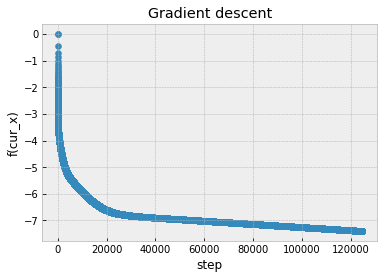

In [15]:
f_solution = f(x)
f_x_0 = f(steps[0][0])
x_axis = [i for i in range(steps.shape[0])]
y_axis = [math.log((f[1] - f_solution)/(f_x_0 - f_solution),10) for f in steps]
plt.scatter(x_axis, y_axis)
plt.title('Gradient descent')
plt.xlabel('step')
plt.ylabel('f(cur_x)')

#### Fast Gradient $$ x^{md}_k=\beta_k^{-1}x_k+(1-\beta_k^{-1})x_k^{ag} $$ $$x_{k+1}=x_k-\gamma_k\nabla f(x_k^{md}) $$$$x_{k+1}^{ag}=\beta_k^{-1}x_{k+1}+(1-\beta_k^{-1})x_k^{ag} $$$$\beta_k=\dfrac{k+1}{2},\gamma_k=\dfrac{k+1}{4L} $$

In [16]:
def fast_grad_descent(eps):
    global x, size
    f_solution = f(x)
    beta = 1
    alpha, _ = def_alpha()
    gamma = 1 / (2 * alpha) 
    # в начале градиентного спуска инициализируем значение x какими-нибудь вектором
    cur_x = np.ones(size)
    cur_x_ag = np.ones(size)
    cur_x_md = np.ones(size)
    cur_x_md = 1 / beta * cur_x + (1 - 1 / beta) * cur_x_ag
    step_k = 1
    steps = [[cur_x, f(cur_x_ag)]]
    # итерация цикла -- шаг градиентнго спуска
    while f(cur_x) - f_solution > eps:
        step_k += 1
        steps.append([cur_x, f(cur_x_ag)])
        beta = (step_k + 1) / 2
        gamma = (1 + step_k) / (4 * alpha)
        cur_x = cur_x - gamma * grad_f(cur_x_md)
        cur_x_ag = 1 / beta * cur_x + (1 - 1 / beta) * cur_x_ag
        cur_x_md = 1 / beta * cur_x + (1 - 1 / beta) * cur_x_ag
    steps.append([cur_x, f(cur_x_ag)])
    return np.array(steps)

In [17]:
size = 100
A,b,x, AA, Ab = generate_data(size)
steps = fast_grad_descent(eps)
print('x_solution = ', steps[-1][0] , '\n', 'f(x) = %.5f'%steps[-1][1])

x_solution =  [ 0.25472813  0.5059103  -0.60656952 -0.61242578 -0.20224523  1.45088921
 -1.36060106 -0.17134007 -0.68962931 -0.92566641 -0.57408083 -0.45687908
 -0.68221216  1.29571193  0.30278813  0.59794291 -0.34968528 -0.76870159
 -0.08705388  0.55741212 -0.65438986 -0.17148469 -0.33432612  0.66998008
 -1.19620774  0.01887237  2.18145519  0.71879817 -0.37907595  0.30891905
 -0.0712541   0.23470985  0.63796906  0.63778063  1.04153367  0.57568877
 -0.59513738  0.40757642 -0.56042251  2.01894792 -1.9180591   0.42800062
 -0.00727297  0.45584478 -0.21359468 -0.61052351 -0.06728563  0.34267449
  1.19600313  0.99755936  1.77916328  0.64813178 -0.82449911 -0.24608933
  0.44156018 -0.59891856 -0.27418202  0.28729483  0.72024837 -0.99715037
  2.53618384 -0.96251823  1.41050595 -2.29622284  1.12027846 -3.7132622
 -1.36272463  1.44150182  0.55344968  0.76687228 -0.38689326  0.40264173
 -0.81334047  0.51583734 -0.60521701 -0.5724041  -0.17127259 -0.80133909
 -2.41557324  1.28156863  0.62593498  

In [18]:
print('count of steps = %d'%steps.shape[0])

count of steps = 3673


Text(0, 0.5, 'f(cur_x)')

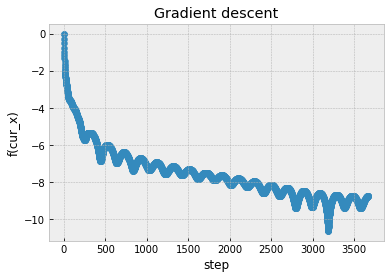

In [19]:
f_solution = f(x)
f_x_0 = f(steps[0][0])
x_axis = [i for i in range(steps.shape[0])]
y_axis = [math.log((f[1] - f_solution)/(f_x_0 - f_solution),10) for f in steps]
plt.scatter(x_axis, y_axis)
plt.title('Gradient descent')
plt.xlabel('step')
plt.ylabel('f(cur_x)')

#### Fast Noizy Gradient

 $$ x^{md}_k=\beta_k^{-1}x_k+(1-\beta_k^{-1})x_k^{ag} $$ $$x_{k+1}=x_k-\gamma_k g(x_k^{md}) $$$$x_{k+1}^{ag}=\beta_k^{-1}x_{k+1}+(1-\beta_k^{-1})x_k^{ag} $$ $$\beta_k=\dfrac{k+1}{2},\gamma_k=\dfrac{k+1}{4L} $$


 where $$\|\nabla f(x) - g(x)\|\leq\beta\|\nabla f(x)\| $$

In [26]:
def fast_noisy_grad_descent(eps, betta):
    global x, size
    f_solution = f(x)
    beta = 1
    alpha, _ = def_alpha()
    gamma = 1 / (2 * alpha) 
    # в начале градиентного спуска инициализируем значение x какими-нибудь вектором
    cur_x = np.ones(size)
    cur_x_ag = np.ones(size)
    cur_x_md = np.ones(size)
    cur_x_md = 1 / beta * cur_x + (1 - 1 / beta) * cur_x_ag
    step_k = 1
    steps = [[cur_x, f(cur_x_ag)]]
    # итерация цикла -- шаг градиентнго спуска
    while f(cur_x) - f_solution > eps:
        step_k += 1
        steps.append([cur_x, f(cur_x_ag)])
        beta = (step_k + 1) / 2
        gamma = (1 + step_k) / (4 * alpha)
        
        norm_vector = betta * norm(grad_f(cur_x_md))
        random_vector = np.random.randn(size)
        normalize_vector = random_vector * norm_vector / norm(random_vector)
        cur_x = cur_x - gamma * (grad_f(cur_x_md) + normalize_vector)
        cur_x_ag = 1 / beta * cur_x + (1 - 1 / beta) * cur_x_ag
        cur_x_md = 1 / beta * cur_x + (1 - 1 / beta) * cur_x_ag
    steps.append([cur_x, f(cur_x_ag)])
    return np.array(steps)

In [27]:
size = 100
A,b,x, AA, Ab = generate_data(size)
betta, eps = 0.1, 0.001

In [28]:
steps = grad_descent(eps, betta)
print('x_solution = ', steps[-1][0] , '\n', 'f(x) = %.5f'%steps[-1][1])

818.2762765234014 0.0009948967749523188
23299.98973802988
x_solution =  [-1.48099229 -0.41381565 -0.01916547 -1.01664448  0.84093152  2.02795679
  0.01087589  0.13181679 -0.76695225  0.16733419  0.49199955 -1.22834834
  0.29210027 -0.51817862  0.75995616  0.70215426 -0.32797003  1.31235216
  0.01536192 -0.03307563 -1.08988326  0.71056469  1.35093178 -2.47149643
 -1.56641177 -1.70829689 -1.67092806 -0.62554252  0.10940827  0.62732903
 -0.53045812 -0.31250404 -1.52161564  0.19608197  0.02617703 -2.04924209
 -0.64899289  1.47880679 -0.08399354 -0.14834321  0.09687658  1.06516089
 -0.53322345 -0.72797797 -0.37956873 -0.13271765  0.51512049 -0.60115044
 -0.15828491  0.79216355 -1.24489055  0.28994959  1.04467276  1.06333564
 -1.26494581  0.05944284 -1.04682894 -0.36035271 -0.77684817 -0.62687289
 -0.90051807  0.15314824 -0.3399155  -0.32933696 -0.06809562  0.28559127
  1.76213915 -0.38689383  1.60083468 -0.16861542 -1.09557088  0.1204523
 -0.52946602 -0.18679551  1.25512229 -0.35974819 -0.1

In [29]:
print('count of steps = %d'%steps.shape[0])

count of steps = 2490


In [30]:
print(x) 

[-1.45327060e+00 -8.97542882e-01  1.06036713e-01 -9.90123410e-01
  1.21834680e+00  2.03760616e+00 -2.03301090e-01  1.31004461e-01
 -5.66493380e-01 -2.92201250e-02  6.48501504e-01 -1.25714177e+00
  4.49518379e-01 -5.63551623e-01  4.94659885e-01  5.83875318e-01
 -1.67745346e-01  1.26783566e+00 -1.95692825e-01 -2.63821800e-01
 -9.12076460e-01  5.49671567e-01  1.21774793e+00 -2.35395919e+00
 -1.66900131e+00 -1.90273891e+00 -1.92713475e+00 -7.13227098e-01
  2.96508709e-01  7.44015732e-01 -3.49504775e-01 -1.99496126e-01
 -1.30072287e+00  2.01129409e-01 -6.48287090e-02 -1.90143874e+00
 -8.06015212e-01  1.23866238e+00  6.76103319e-03 -6.66549673e-02
  1.05959834e-01  1.21606179e+00 -4.47662767e-01 -8.27309326e-01
 -4.79037283e-01 -1.48031010e-03  3.56084305e-01 -9.30998280e-01
 -3.05636688e-01  7.61742404e-01 -1.31456919e+00  3.34014619e-01
  9.69491869e-01  8.81853873e-01 -1.30652085e+00 -1.14854254e-01
 -1.19210176e+00 -3.63923054e-01 -8.23226481e-01 -7.87015258e-01
 -7.25837210e-01  8.99150

Text(0, 0.5, 'f(cur_x)')

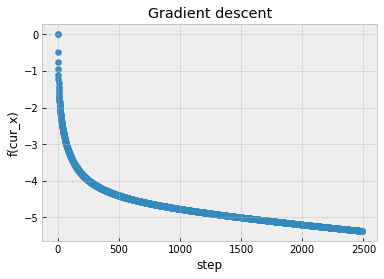

In [31]:
f_solution = f(x)
f_x_0 = f(steps[0][0])
x_axis = [i for i in range(steps.shape[0])]
y_axis = [math.log((f[1] - f_solution)/(f_x_0 - f_solution),10) for f in steps]
plt.scatter(x_axis, y_axis)
plt.title('Gradient descent')
plt.xlabel('step')
plt.ylabel('f(cur_x)')